# This model was created by following the instruction provided by https://github.com/nicknochnack and from the tutorial provided in the owner youtube channel.

The changes that has been made is:
1. Adding different gesture to be detected by the model
2. Adding more gesture that can be detected by the model
3. Changing and modifying the colour for the accuracy parameter
4. Changing the value numbers of dataset used to train the model

Thankyou.

# 1 Installing packages and dependencies used

In [1]:
import cv2
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import mediapipe as mp

# 2. Getting keypoints data from Mediapipe Landmarks from image captured

In [2]:
#2. Getting keypoints data from Mediapipe Landmarks from image captured
#Creating Landmarks for images using Mp Holistic

mp_holistic = mp.solutions.holistic #holistic model

#draw utils used to draw landmarks on object detected (face, pose, right hand, left hand)
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [3]:
#Creating Functions for Landmarks detection
def mediapipe_detection(image, model):
    #cvt color used to converts an input image from one color to another
    #fungsinya buat nandain nanti objek yang di detect make warna yg beda2
    #variabel image dipakai untuk nyimpen data dari landmarks
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion from BGR to RGB
    image.flags.writeable = False                  # Image no longer writeable
    results = model.process(image)                 # Making predictions
    image.flags.writeable = True                   #Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion from RGB to BGR
    return image, results                          #returning the result to the loop

In [4]:
#Creating Functions for Landmarks drawing
def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [ ]:
#Opening Camera for Image Collection
cap = cv2.VideoCapture(0)
#setting mediapipe model
#min det con is for initial detection, and min tracking it will make initial detection and to track the keypoints
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #reading feed from webcam
        ret, frame = cap.read()

        #making detections
        image, results = mediapipe_detection(frame, holistic)
        
        #draw landmarks
        draw_landmarks(image, results)

        #show to screen (open cv feed nama windownya)
        cv2.imshow('FRAME', image)

        #breaking the loop to stop the window   
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2. destroyAllWindows()

In [7]:
    cap.release()
    cv2. destroyAllWindows()

# 3. Extracting keypoints value

In [8]:
results.pose_landmarks.landmark

[x: 0.39198482036590576
y: 0.6495494246482849
z: -1.602291464805603
visibility: 0.9997355341911316
, x: 0.4298523962497711
y: 0.5416575074195862
z: -1.5139275789260864
visibility: 0.9997833967208862
, x: 0.45960426330566406
y: 0.5318794846534729
z: -1.514350175857544
visibility: 0.9998301863670349
, x: 0.4874087870121002
y: 0.5230235457420349
z: -1.5142662525177002
visibility: 0.9998394846916199
, x: 0.3506214916706085
y: 0.5597893595695496
z: -1.4853137731552124
visibility: 0.9995574355125427
, x: 0.32558852434158325
y: 0.5621614456176758
z: -1.4845541715621948
visibility: 0.9993979334831238
, x: 0.30519622564315796
y: 0.5642805695533752
z: -1.4848792552947998
visibility: 0.9991391897201538
, x: 0.524468719959259
y: 0.5408555865287781
z: -0.9349867701530457
visibility: 0.9998990893363953
, x: 0.28975340723991394
y: 0.5906090140342712
z: -0.7708786725997925
visibility: 0.9996000528335571
, x: 0.44831299781799316
y: 0.736696183681488
z: -1.3848546743392944
visibility: 0.9998224377632141

In [9]:
results.face_landmarks.landmark

[x: 0.4015180766582489
y: 0.7368748784065247
z: -0.025163138285279274
, x: 0.3980816602706909
y: 0.6735541820526123
z: -0.06032893806695938
, x: 0.3993844985961914
y: 0.6893280148506165
z: -0.028028007596731186
, x: 0.3843008875846863
y: 0.5997816324234009
z: -0.0508478619158268
, x: 0.3969055414199829
y: 0.6521029472351074
z: -0.06592667102813721
, x: 0.3954622447490692
y: 0.6215717792510986
z: -0.06376513093709946
, x: 0.39213162660598755
y: 0.5447346568107605
z: -0.040182530879974365
, x: 0.3091989755630493
y: 0.5398532152175903
z: 0.007005190011113882
, x: 0.38966482877731323
y: 0.49067169427871704
z: -0.03833913803100586
, x: 0.38817209005355835
y: 0.46155980229377747
z: -0.043985359370708466
, x: 0.38175052404403687
y: 0.3428691029548645
z: -0.042481038719415665
, x: 0.40203261375427246
y: 0.747556209564209
z: -0.022713828831911087
, x: 0.4026021659374237
y: 0.7555930018424988
z: -0.01793646812438965
, x: 0.40306782722473145
y: 0.7585529088973999
z: -0.012134240940213203
, x: 0.4

In [10]:
len(results.face_landmarks.landmark)

468

In [11]:
len(results.pose_landmarks.landmark)

33

In [12]:
#buat extracting keypoints yang ada, hasil data keypoints dari pengambilan gambar sebelumnya bakal dimasukin kedalam variabel
#data yang dimasukin ke variable dalam bentuk array, tapi kalo datanya gaada bakal diisi sama array yang nilainya 0 sebanyak jumlah seharusnya
#seluruh data yang ada akan di flatten biar jadi 1 big array didalam variablenya
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
extract_keypoints(results).shape

(1662,)

In [14]:
result_test = extract_keypoints(results)

In [15]:
#data yang disimpen dari hasil test akan disimpen dalam bentuk numpy diawali dengan nama 0
np.save('0', result_test)

In [16]:
np.load('0.npy')

array([ 0.39198482,  0.64954942, -1.60229146, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setuping Folder for Data Collection

In [17]:
#4. Setuping Folder for Data Collection

#path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#actions that being tried to detect
actions = np.array(['Saya','Anda','Terima Kasih','Maaf','Cinta'])

#thirty videos worth of data
no_sequences = 30

#videos going to be 10 frames in length in every video
sequence_length = 20

In [18]:
for action in actions: #bakal ngeloop pas proses pembuatan variabel action
    for sequence in range(no_sequences): #bakal ngeloop sebanyak jumlah sequences
        try: 
            #bakal bikin folder pas loopnya jalan sesuai nama stringnya
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            #kalo foldernya udah ada, bakal di skip prosesnya
            pass

# 5. Collecting landmarks Dataset for Training and Testing

In [ ]:
#5. Collecting landmarks Dataset for Training and Testing

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'MULAI PENGAMBILAN GAMBAR', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Pengambilan gambar untuk {} Urutan Ke-{} '.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Data Collecting', image)
                    cv2.waitKey(4000)
                else: 
                    cv2.putText(image, 'Pengambilan gambar untuk {} Urutan Ke-{} '.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Data Collecting', image)
                
                # NEW Export keypoints
                # data keypoints yang didapet bakal di extract kedalam folder dari setiap action yang ada
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Data Preprocessing

In [19]:
#importing model selection for splitting data into train and test
from sklearn.model_selection import train_test_split
#dipakai to_categorical buat convert data yang ada ke bentuk binary buat ngelakuin one hot encoding
from tensorflow.keras.utils import to_categorical

In [20]:
#buat label map untuk defining setiap action dari array yang ada
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'Saya': 0, 'Anda': 1, 'Terima Kasih': 2, 'Maaf': 3, 'Cinta': 4}

In [22]:
sequences, labels = [], [] #sequences represents x data (features) and labels is y data (labels)
for action in actions:
    for sequence in range(no_sequences): #gonna loop thru 30 videos, videos became sequences
        window = [] #represent all the different frames for particular sequences
        
        #loading up every frames in a sequence from 0 to 29 then going to the next sequence
        for frame_num in range(sequence_length): #dalam setiap frame sesuai nomornya
            #using numpy to load array frame yang tadi ada sebelumnya, sampingnya adalah path data sequencenya
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
#converting data for one hot encoding
y = to_categorical(labels).astype(int)

In [24]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [25]:
np.array(sequences).shape

(150, 20, 1662)

In [26]:
np.array(labels).shape

(150,)

In [27]:
#data dari sequences sebelumnya disimpen di numpy array
X = np.array(sequences)

In [28]:
#jumlah keseluruhan data
#ada 150 sequence yang berisi 20 frame dimana dengan total data 1662 pada setiap frame
X.shape

(150, 20, 1662)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [31]:
X_val.shape

(15, 20, 1662)

In [32]:
y_val.shape

(15, 5)

In [33]:
X_test.shape

(8, 20, 1662)

In [34]:
y_test.shape

(8, 5)

In [35]:
X_train.shape

(127, 20, 1662)

In [36]:
y_train.shape

(127, 5)

# 7. Building and Training LSTM Neural Network Model

In [37]:
#sequential to build sequential neural network
from tensorflow.keras.models import Sequential
#going to be LSTM layer to build neural network, Dense for fully connected layer
from tensorflow.keras.layers import LSTM, Dense
#logging into tensorboard for tracing model training
from tensorflow.keras.callbacks import TensorBoard

In [38]:
X_train.shape

(127, 20, 1662)

In [40]:
#tensorboard callback (web udates to trace neural network training)
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,1662)))
model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
#categorical entropy is used because binaries classification model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
#bisa ditambahin add ons dari keras buat stop training once the data is fit
history = model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback], validation_data=(X_val, y_val))

Epoch 1/200
4/4 [==============================] - 3s 186ms/step - loss: 1.6900 - categorical_accuracy: 0.1969 - val_loss: 1.6479 - val_categorical_accuracy: 0.1333
Epoch 2/200
4/4 [==============================] - 0s 64ms/step - loss: 1.7700 - categorical_accuracy: 0.1969 - val_loss: 1.5991 - val_categorical_accuracy: 0.1333
Epoch 3/200
4/4 [==============================] - 0s 56ms/step - loss: 1.6482 - categorical_accuracy: 0.1890 - val_loss: 4.2834 - val_categorical_accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 55ms/step - loss: 1.9613 - categorical_accuracy: 0.2441 - val_loss: 1.7470 - val_categorical_accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 56ms/step - loss: 1.8727 - categorical_accuracy: 0.2047 - val_loss: 1.5582 - val_categorical_accuracy: 0.3333
Epoch 6/200
4/4 [==============================] - 0s 55ms/step - loss: 1.6750 - categorical_accuracy: 0.2126 - val_loss: 1.6456 - val_categorical_accuracy: 0.2667
Epoch 7

Epoch 51/200
4/4 [==============================] - 0s 59ms/step - loss: 0.9111 - categorical_accuracy: 0.6850 - val_loss: 0.9045 - val_categorical_accuracy: 0.6667
Epoch 52/200
4/4 [==============================] - 0s 61ms/step - loss: 0.8252 - categorical_accuracy: 0.7244 - val_loss: 0.8315 - val_categorical_accuracy: 0.5333
Epoch 53/200
4/4 [==============================] - 0s 58ms/step - loss: 0.7858 - categorical_accuracy: 0.6850 - val_loss: 1.0361 - val_categorical_accuracy: 0.4667
Epoch 54/200
4/4 [==============================] - 0s 62ms/step - loss: 0.8766 - categorical_accuracy: 0.5512 - val_loss: 1.1536 - val_categorical_accuracy: 0.4667
Epoch 55/200
4/4 [==============================] - 0s 58ms/step - loss: 0.8284 - categorical_accuracy: 0.6693 - val_loss: 0.9621 - val_categorical_accuracy: 0.3333
Epoch 56/200
4/4 [==============================] - 0s 60ms/step - loss: 0.7491 - categorical_accuracy: 0.6614 - val_loss: 0.8474 - val_categorical_accuracy: 0.4667
Epoch 57/2

Epoch 101/200
4/4 [==============================] - 0s 58ms/step - loss: 0.2636 - categorical_accuracy: 0.8898 - val_loss: 0.5177 - val_categorical_accuracy: 0.7333
Epoch 102/200
4/4 [==============================] - 0s 57ms/step - loss: 0.3192 - categorical_accuracy: 0.8661 - val_loss: 0.2405 - val_categorical_accuracy: 0.8667
Epoch 103/200
4/4 [==============================] - 0s 57ms/step - loss: 0.2945 - categorical_accuracy: 0.8819 - val_loss: 0.2680 - val_categorical_accuracy: 0.8000
Epoch 104/200
4/4 [==============================] - 0s 57ms/step - loss: 0.2160 - categorical_accuracy: 0.9291 - val_loss: 0.1185 - val_categorical_accuracy: 1.0000
Epoch 105/200
4/4 [==============================] - 0s 57ms/step - loss: 0.1773 - categorical_accuracy: 0.9528 - val_loss: 0.1465 - val_categorical_accuracy: 1.0000
Epoch 106/200
4/4 [==============================] - 0s 57ms/step - loss: 0.1666 - categorical_accuracy: 0.9528 - val_loss: 0.0785 - val_categorical_accuracy: 1.0000
Epoc

4/4 [==============================] - 0s 59ms/step - loss: 0.0368 - categorical_accuracy: 0.9921 - val_loss: 0.0154 - val_categorical_accuracy: 1.0000
Epoch 200/200
4/4 [==============================] - 0s 58ms/step - loss: 0.0436 - categorical_accuracy: 0.9843 - val_loss: 0.0163 - val_categorical_accuracy: 1.0000


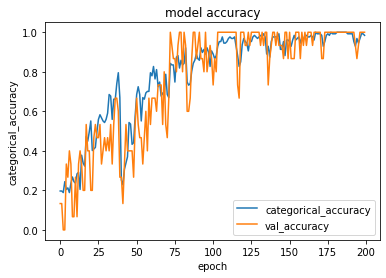

In [44]:
#accuracy chart
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['categorical_accuracy', 'val_accuracy'], loc='lower right')
plt.show()

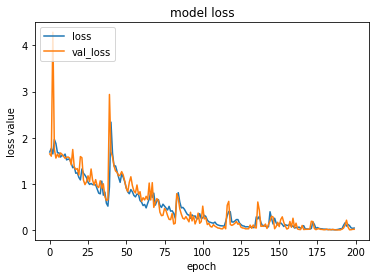

In [45]:
#loss chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
model.save('action.h5')

In [ ]:
model.load_weights('action.h5')

In [46]:
#menunjukan deskripsi tentang model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 20, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 485,765
Trainable params: 485,765
Non-trai

In [ ]:
os.getcwd()

# 8. Making Predictions from the data

In [47]:
res = model.predict(X_test)

In [48]:
actions[np.argmax(res[0])]

'Anda'

In [49]:
actions[np.argmax(y_test[1])]

'Cinta'

# 9. Saving Model Weights 

In [ ]:
model.save('model.h5')

In [ ]:
del model

In [ ]:
model.load_weights('model.h5')

# 10. Evaluation with Confusion Matrix

In [50]:
#multilabel bakal ngasih confusion matrix buat setiap label
#accuracy score buat test akurasi
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[6, 1],
        [0, 1]],

       [[5, 0],
        [0, 3]],

       [[6, 0],
        [1, 1]],

       [[6, 0],
        [0, 2]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

0.875

# 11. Realtime Testing

In [55]:
colors = [(245,117,16), (117,245,16), (16,117,245), (120,127,245), (130,125,145)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [59]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.7 #the model will only recognize actions in a minimum value decided

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-20:]
        
        if len(sequence) == 20:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]: #checking the current action not the same as last sentences
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:] #if the sentences has more than 5, we only take the last 5 value

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
        
        #position of sentences rectangle
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class '

Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<cl

Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<cl

Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terima Kasih
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class '

Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class '

Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cint

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<clas

Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class '

Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<cl

Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'

Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<cl

Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cinta
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class '

Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<cl

Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Anda
<cl